# Linear Algebra Matrix Operations:

The following notebook consists of:
1. Implementation of elementary row operations : Scaling, Replacement, Interchange
2. Using the defined functions to find the answer of a system
3. Calculation of the determinant
4. Plotting the answer


### 0. Libraries

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

## 1. Implementation of elementary row operations
Implement these operations from scratch, for they will be used for upcoming sections


### 1.1. Scaling

In [2]:
def op_scale(A, R, C):
    temp = A[R].astype(float) * C
    A[R] = temp

In [3]:
#e.g.
A = np.array([[10, 3, 2, 1],
               [ 1, 0, 4, 2],
               [ 7, 5,-1, 9],
               [-6,-7, 8,-4]])

op_scale(A, 2, 3)
"""
 Expected_output = [[10, 3, 2, 1],
                    [ 3, 0,12, 6],
                    [ 7, 5,-1, 9],
                    [-6,-7, 8,-4]]
"""

'\n Expected_output = [[10, 3, 2, 1],\n                    [ 3, 0,12, 6],\n                    [ 7, 5,-1, 9],\n                    [-6,-7, 8,-4]]\n'

### 1.2. Interchange

In [4]:
def op_interchange(A, R1, R2):
    R1-=1
    R2-=1
    temp = np.array(A[R1])
    A[R1] = A[R2]
    A[R2] = temp
    return A

In [5]:
# e.g.
op_interchange(A, 3, 4)
"""
Expected_output = [[10, 3, 2, 1],
                    [ 3, 0,12, 6],
                    [-6,-7, 8,-4],
                    [ 7, 5,-1, 9]]
"""

'\nExpected_output = [[10, 3, 2, 1],\n                    [ 3, 0,12, 6],\n                    [-6,-7, 8,-4],\n                    [ 7, 5,-1, 9]]\n'

### 1.3. Replace

In [6]:
def op_replace(A, R1, R2 , C):
    temp = np.array(A[R2])
    temp = temp + C * A[R1]
    A[R2] = temp
    return A

In [7]:
# e.g.
op_replace(A, 2, 1, 4)
"""
Expected_output = [[22, 3,50,25],
                   [ 3, 0,12, 6],
                   [-6,-7, 8,-4],
                   [ 7, 5,-1, 9]]
"""


'\nExpected_output = [[22, 3,50,25],\n                   [ 3, 0,12, 6],\n                   [-6,-7, 8,-4],\n                   [ 7, 5,-1, 9]]\n'

## 2. Solving a system of linear equations
In this part, you are required to use the functions defined in the previous part to find the solution to a linear system of equations.


### 2.1. Row Echelon Form

In [8]:
def row_echelon(A):
    matrix_row_count = A.shape[0]
    matrix_column_count = A.shape[1]
    if matrix_row_count == 1:
        if A[0,0] != 0:
            op_scale(A, 0, 1/A[0, 0])
        return 0
    i = 1
    # r is the number of row interchanges (it is used to calculate the determinant)
    r = 0
    while i < matrix_row_count and A[0, 0] == 0:
        op_interchange(A, 0+1, i+1)
        r += 1
        i += 1
    if A[0,0] != 0:
        op_scale(A, 0, 1/A[0,0])
    for i in range(1, matrix_row_count):
        op_replace(A, 0, i, -A[i, 0])
    r += row_echelon(A[1:, 1:])
    return r

In [9]:
#e.g.
B = np.array([[ 1, 2, 3, 4],
              [ 5, 6, 7, 8],
              [ 9,10,11,12]])
row_echelon(B)
""""
Notice that any true row-echelon form is acceptable. An example is given below:
([[ 1, 2, 3, 4],
  [ 0,-4,-8,-12],
  [ 0, 0, 0, 0]])
"""


[[1 2 3 4]
 [0 1 2 3]
 [0 0 0 0]]


'"\nNotice that any true row-echelon form is acceptable. An example is given below:\n([[ 1, 2, 3, 4],\n  [ 0,-4,-8,-12],\n  [ 0, 0, 0, 0]])\n'

### 2.2. Reduce Row Echelon Form

In [10]:
def reduce(A):
    matrix_row_count = A.shape[0]
    matrix_column_count = A.shape[1]
    column_counter = 0
    # to reach the pivot position in a row 
    while column_counter < matrix_column_count and A[0, column_counter] == 0:
        column_counter += 1
    # if the column_counter == matrix_column_count we have a all zero row
    if column_counter == matrix_column_count :
        return
    op_scale(A, 0, 1/A[0, column_counter])
    # We only need to scale the last row
    if matrix_row_count == 1:
        return
    for i in range(1, matrix_row_count):
        column_counter = i
        while column_counter < matrix_column_count and A[i, column_counter] == 0:
            column_counter += 1
        # if the column_counter == matrix_column_count we have a all zero row
        if column_counter != matrix_column_count :
            op_replace(A ,i ,0 , -A[0, column_counter]/A[i, column_counter])
    reduce(A[1:, 1:])

In [11]:
# e.g.
B = np.array([[ 1, 2, 3, 4],
              [ 0,-4,-8,-12],
              [ 0, 0, 0, 0]])
reduce(B)
"""
Expected_output = [[ 1, 0,-1,-2],
                   [ 0, 1, 2, 3],
                   [ 0, 0, 0, 0]]
"""

[[ 1  0 -1 -2]
 [ 0  1  2  3]
 [ 0  0  0  0]]


'\nExpected_output = [[ 1, 0,-1,-2],\n                   [ 0, 1, 2, 3],\n                   [ 0, 0, 0, 0]]\n'

### 2.3. Existence of the Solution
Based on the reduced form of the augmented matrix and prior to finding the answer, make sure the solution exists!

In [12]:
def is_consistent(A):
    matrix_row_count = A.shape[0]
    matrix_column_count = A.shape[1]    
    for i in range (0, matrix_row_count):
        all_zero = True
        for j in range (0, matrix_column_count):
            if j == matrix_column_count - 1:
                if all_zero and A[i, j] != 0:
                    return False
            else:
                if A[i, j] != 0:
                    all_zero = False
    return True

In [13]:
#e.g.
is_consistent(B)

"""
expected_output: true
"""

True


'\nexpected_output: true\n'

### 2.4. Uniqueness of the Solution
Based on prior information, make sure whether the solution is unique or not!

In [14]:
def is_unique(A):
    pivot_positions_count = 0 
    matrix_row_count = A.shape[0]
    matrix_column_count = A.shape[1]
    for i in range (0, matrix_row_count):
        column_counter = i
        # to reach the pivot position in a row 
        while column_counter < matrix_column_count and A[i, column_counter] == 0:
            column_counter += 1
        # if the column_counter == matrix_column_count we have a all zero row
        if column_counter != matrix_column_count :
            pivot_positions_count += 1
    if pivot_positions_count < matrix_column_count - 1:
        return False
    return True


In [15]:
#e.g.
is_unique(B)
"""
expected_output: false
"""

False


'\nexpected_output: false\n'

### 2.5. Finding (just a) Solution
If the system has a solution, find and return it.
If the system has infinite solutions, return only one solution and double-check it with the original system defintion.

In [16]:
def solve(A):
    row_echelon(A)
    reduce(A)
    if is_consistent(A):
        return A[:, A.shape[1]-1]
    return None
            

## 3. Determinant
In this section, you are requiered to find the determinant of a matrix in two different ways and compare them in the sense of computation complexity.


### 3.1. Recursive algorithm
Implement a recursive algorithm to compute the determinant of a N*N matrix, using expansion with respect to a column or a row.


In [17]:
def det_recursive(A):
    matrix_row_count = A.shape[0]
    matrix_column_count = A.shape[1]
    if matrix_row_count != matrix_column_count :
        return None 
    if matrix_row_count == 1:
        return A[0, 0]
    det = 0
    for j in range (0, matrix_column_count):
        indices = np.arange(0, matrix_column_count)
        indices = np.delete(indices, j, 0)
        temp = np.take(A, indices, 1)
        det += ((-1) ** (j+2)) * A[0, j] * det_recursive(temp[1:,:])
    return det

In [18]:
#e.g.
Matrix = np.array([[ 5, 7,-2, 1],
                   [-1, 5,-3, 0],
                   [ 3,11,-2,-9],
                   [ 8, 0, 4,-1]])
det_recursive(Matrix)
"""
expected_output = 190
"""

190


'\nexpected_output = 190\n'

#### 3.1.1. Test your algorithm
Measure the computation time of you recursive algorithm by testing it N*N matrixes, N= 2, 3, 4, 5, 6, 7

In [19]:
# Testing
M2 = np.array([[4,5],[2,3]])
M3 = np.array([[3,2,1],[2,2,2],[0,3,1]])
# define the rest of the matrixes up to 7*7, you may use random number generators
M4 = np.arange(16).reshape(4,4)
M5 = np.arange(25).reshape(5,5)
M6 = np.arange(36).reshape(6,6)
M7 = np.arange(49).reshape(7,7)

elapsed_time_recursive=[0]*6

start_time = time.time()
d1 = det_recursive(M2)
end_time = time.time()
elapsed_time_recursive[0] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M2 : " , elapsed_time_recursive[0])

# Do the same for the rest of the matrices up to 7*7

start_time = time.time()
d2 = det_recursive(M3)
end_time = time.time()
elapsed_time_recursive[1] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M3 : " , elapsed_time_recursive[1])

start_time = time.time()
d3 = det_recursive(M4)
end_time = time.time()
elapsed_time_recursive[2] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M4 : " , elapsed_time_recursive[2])

start_time = time.time()
d4 = det_recursive(M5)
end_time = time.time()
elapsed_time_recursive[3] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M5 : " , elapsed_time_recursive[3])

start_time = time.time()
d5 = det_recursive(M6)
end_time = time.time()
elapsed_time_recursive[4] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M6 : " , elapsed_time_recursive[4])

start_time = time.time()
d6 = det_recursive(M7)
end_time = time.time()
elapsed_time_recursive[5] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M7 : " , elapsed_time_recursive[5])


Time Elapsed for recursive computation of determinant of M2 :  0.0
Time Elapsed for recursive computation of determinant of M3 :  0.0010046958923339844
Time Elapsed for recursive computation of determinant of M4 :  0.001992464065551758
Time Elapsed for recursive computation of determinant of M5 :  0.0029904842376708984
Time Elapsed for recursive computation of determinant of M6 :  0.007063388824462891
Time Elapsed for recursive computation of determinant of M7 :  0.06680750846862793


### 3.2. Row Echelon
Use the function defined in part 1 to find the row echelon form of the matrix and calculate the determinant

#### ATTENTION: BEWARE OF THE IMPACT OF EACH OPERATION ON THE DETERMINANT!

In [20]:
def det_row_echelon(A):
    matrix_row_count = A.shape[0]
    matrix_column_count = A.shape[1]
    if matrix_row_count != matrix_column_count :
        return None 
    if matrix_row_count == 1:
        return A[0, 0]
    r = row_echelon(A)
    det = 1
    for i in np.diagonal(A):
        det *= i
    return det * ((-1) ** r)                                                                     

#### 3.2.1 Test the algorithm
Measure the computation time of the recursive algorithm by testing it on the matrixes defined in the previous section.

In [21]:
# Testing
elapsed_time_rowechelon=[0]*6

start_time = time.time()
d1 = det_row_echelon(M2)
end_time= time.time()
elapsed_time_rowechelon[0] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M2 : " , elapsed_time_rowechelon[0])

# Do the same for the rest of the matrices up to 7*7

start_time = time.time()
d2 = det_row_echelon(M3)
end_time = time.time()
elapsed_time_rowechelon[1] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M3 : " , elapsed_time_recursive[1])

start_time = time.time()
d3 = det_row_echelon(M4)
end_time = time.time()
elapsed_time_rowechelon[2] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M4 : " , elapsed_time_recursive[2])

start_time = time.time()
d4 = det_row_echelon(M5)
end_time = time.time()
elapsed_time_rowechelon[3] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M5 : " , elapsed_time_recursive[3])

start_time = time.time()
d5 = det_row_echelon(M6)
end_time = time.time()
elapsed_time_rowechelon[4] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M6 : " , elapsed_time_recursive[4])

start_time = time.time()
d6 = det_row_echelon(M7)
end_time = time.time()
elapsed_time_rowechelon[5] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M7 : " , elapsed_time_recursive[5])


Time Elapsed for recursive computation of determinant of M2 :  0.0
Time Elapsed for recursive computation of determinant of M3 :  0.0010046958923339844
Time Elapsed for recursive computation of determinant of M4 :  0.001992464065551758
Time Elapsed for recursive computation of determinant of M5 :  0.0029904842376708984
Time Elapsed for recursive computation of determinant of M6 :  0.007063388824462891
Time Elapsed for recursive computation of determinant of M7 :  0.06680750846862793


### 3.3. Compare the computation time of the two proposed methods
Try to plot the computation time versus matrix size for both methods using matplotlib functions.

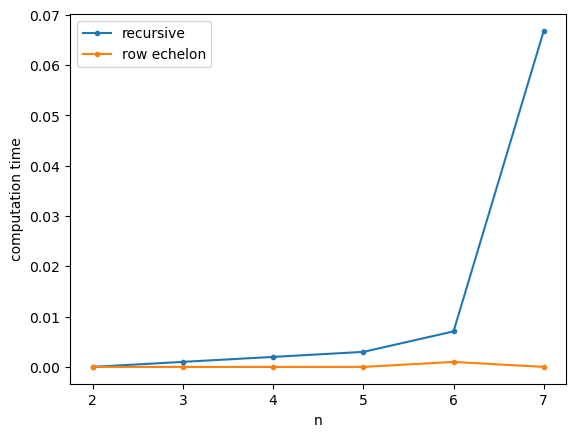

In [22]:
# Plot the recorded data
plt.plot([2,3,4,5,6,7], elapsed_time_recursive, marker = ".")
plt.plot([2,3,4,5,6,7], elapsed_time_rowechelon, marker = ".")
plt.xlabel("n")
plt.ylabel("computation time")
plt.legend(["recursive","row echelon"])
plt.show()

## 4. 2D and 3D plotting
This part solves two underdetermined systems of size N=2 and N=3 and plot the hyperplane of the results using matplotlib.
For example if a 2*2 system in underdetermined (has infinitely many solutions), the solution space is the span of a vector set consisting of one 2-dimentional vector, thus it can be plotted as a line in the 2D space.

In [23]:
def general_solve(A):
    row_echelon(A)
    reduce(A)
    n = A.shape[0]
    if is_consistent(A) and is_unique(A):
        return A[:, A.shape[1]-1]
    elif is_consistent(A):
        if n == 2:
            x = np.zeros((2,100))
            if not np.any(A[0]):
                x[0] = np.linspace(0, 1, 100)
                x[1] = np.linspace(0, 1, 100)
            elif not np.any(A[1]):
                x[1] = np.linspace(0, 1, 100)
                x[0] = A[0,2] - A[0,1] * x[1]
            return x
        if n == 3:
            x = np.zeros((3,100))
            if not np.any(A[0]):
                x[0] = np.linspace(0, 1, 100)
                x[1] = np.linspace(0, 1, 100)
                x[2] = np.linspace(0, 1, 100)
            elif not np.any(A[1]):
                x[1] = np.linspace(0, 1, 100)
                x[2] = np.linspace(0, 1, 100)
                x[0] = A[0,3] - A[0,1] * x[1] - A[0,2] * x[2]
            elif not np.any(A[2]):
                x[2] = np.linspace(0, 1, 100)
                x[1] = A[1,3] - A[1,2] * x[2] 
                x[0] = A[0,3] - A[0,1] * x[1] - A[0,2] * x[2]
            return x
    return None

[[3.         2.97979798 2.95959596 2.93939394 2.91919192 2.8989899
  2.87878788 2.85858586 2.83838384 2.81818182 2.7979798  2.77777778
  2.75757576 2.73737374 2.71717172 2.6969697  2.67676768 2.65656566
  2.63636364 2.61616162 2.5959596  2.57575758 2.55555556 2.53535354
  2.51515152 2.49494949 2.47474747 2.45454545 2.43434343 2.41414141
  2.39393939 2.37373737 2.35353535 2.33333333 2.31313131 2.29292929
  2.27272727 2.25252525 2.23232323 2.21212121 2.19191919 2.17171717
  2.15151515 2.13131313 2.11111111 2.09090909 2.07070707 2.05050505
  2.03030303 2.01010101 1.98989899 1.96969697 1.94949495 1.92929293
  1.90909091 1.88888889 1.86868687 1.84848485 1.82828283 1.80808081
  1.78787879 1.76767677 1.74747475 1.72727273 1.70707071 1.68686869
  1.66666667 1.64646465 1.62626263 1.60606061 1.58585859 1.56565657
  1.54545455 1.52525253 1.50505051 1.48484848 1.46464646 1.44444444
  1.42424242 1.4040404  1.38383838 1.36363636 1.34343434 1.32323232
  1.3030303  1.28282828 1.26262626 1.24242424 1.2

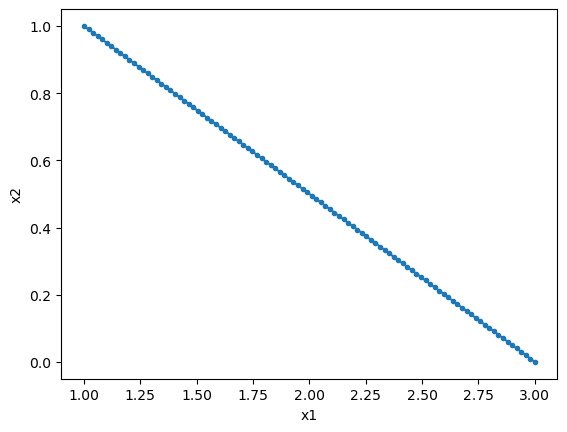

In [24]:
A2 = np.array([[1,2,3],
      [2,4,6]])
x2 = general_solve(A2)
print(x2)
plt.plot(x2[0],x2[1], marker = ".")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

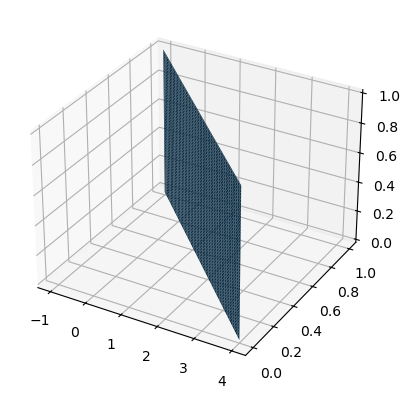

In [25]:
# A3 = np.array([[ 1, 2, 3, 4],
#               [ 5, 6, 7, 8],
#               [ 9,10,11,12]])
A3 = np.array([[ 1, 2, 3, 4],
              [ 0, 0, 0, 0],
              [ 0, 0, 0, 0]])
x3 = general_solve(A3)
ax = plt.axes(projection = '3d')
if not np.array_equal(x3, None):
    if np.array_equal(x3[1],np.linspace(0,1,100)) and np.array_equal(x3[2], np.linspace(0,1,100)):
        z = np.outer(x3[2],np.ones(100))
        ax.plot_surface(x3[0], x3[1], z)
    else:
        ax.plot3D(x3[0],x3[1],x3[2], marker = "." )
ax.set_xlabel = "x1"
ax.set_ylabel = "x2"
ax.set_zlabel = "x3"
plt.show()